In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import json

In [2]:
def load_states(path):
    with open(path, "r") as f:
        states = json.load(f)

    # Optional: convert back to NumPy
    for s in states:
        s["x"] = np.array(s["x"])
        s["v"] = np.array(s["v"])
        s["a"] = np.array(s["a"])
        s["m"] = np.array(s["m"])
    return states

In [3]:
def total_energy(x, v, m, G=6.67430e-11):
    KE = 0.5 * np.sum(m[:, None] * np.sum(v**2, axis=1))
    PE = 0.0
    N = len(m)
    for i in range(N):
        for j in range(i+1, N):
            r = np.linalg.norm(x[i] - x[j])
            PE -= G * m[i] * m[j] / r
    return KE + PE

def total_angular_momentum(x, v, m):
    L = np.zeros(3)
    for i in range(len(m)):
        r3 = np.array([x[i,0], x[i,1], 0])
        v3 = np.array([v[i,0], v[i,1], 0])
        L += m[i] * np.cross(r3, v3)
    return L

def total_linear_momentum(v, m):
    P = np.sum(m[:, None] * v, axis=0)
    return P

def center_of_mass(x, m):
    return np.sum(m[:,None] * x, axis=0) / np.sum(m)

In [4]:
def plot_energy_error(errors, t):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Error")
    ax.set_title("Energy Error over time")
    ax.plot(t, errors)
    plt.show()

def plot_total_angular_momentum(dL, t):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Angular Momentum Drift [m/s]")
    ax.set_title("Total Angular Momentum Drift over time")
    ax.plot(t, dL)
    plt.show()

def plot_total_linear_momentum(dM, t):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Linear Momentum Drift [m/s]")
    ax.set_title("Total Linear Momentum Drift over time")
    ax.plot(t, dM)
    plt.show()

def plot_center_of_mass(com, t): 
    plt.figure(figsize=(12,6))
    plt.plot(t, com)
    plt.xlabel("Time [s]")
    plt.ylabel("|R_m| [m]")
    plt.title("Center of Mass Magnitude Drift")
    plt.show()

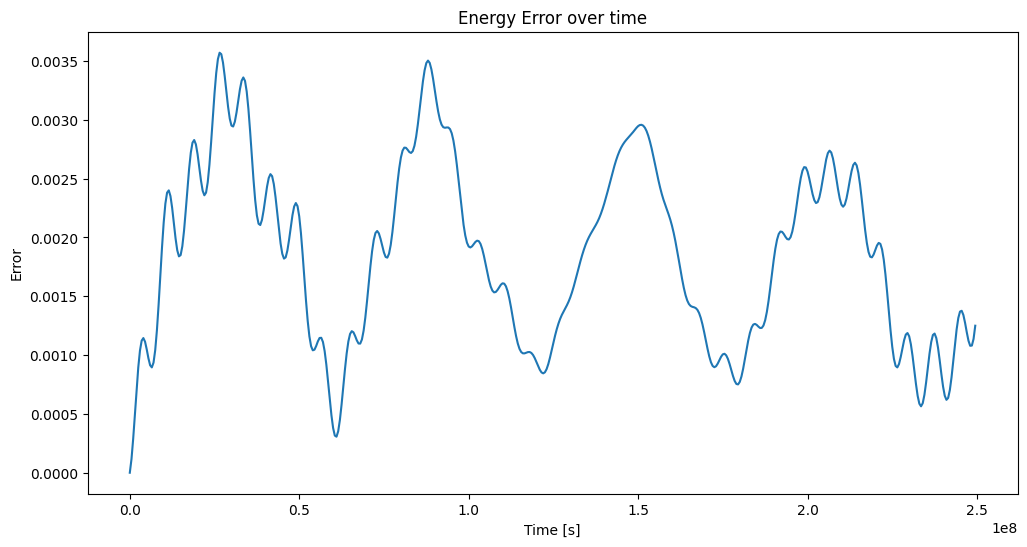

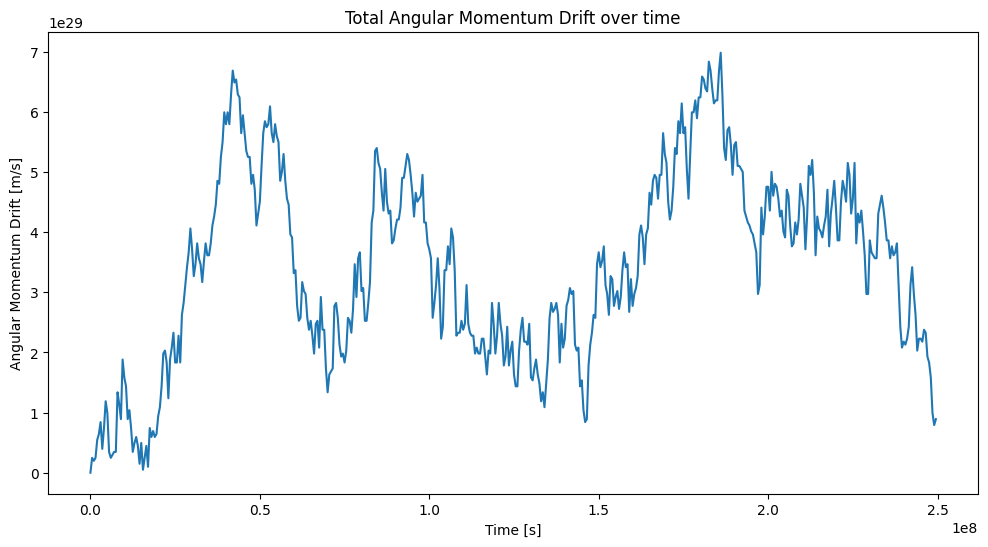

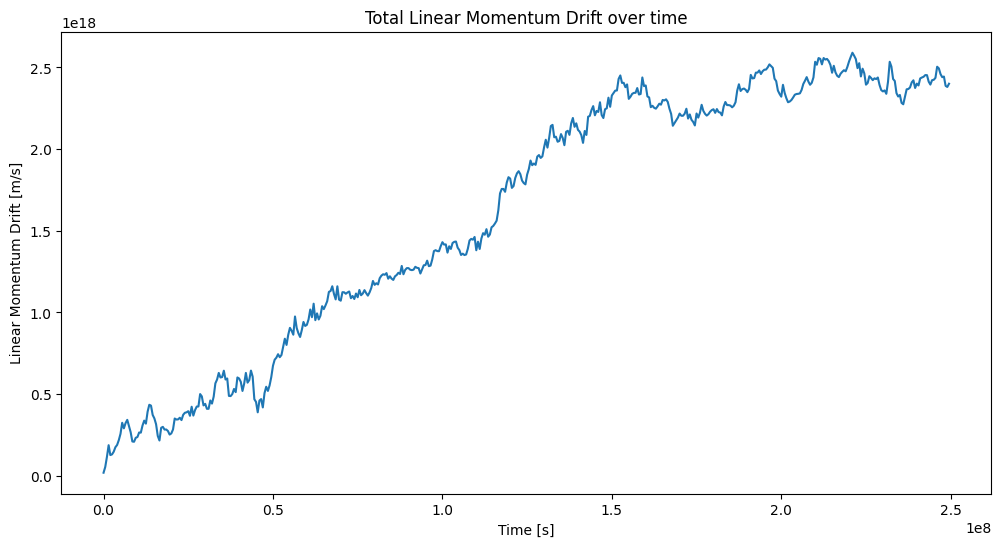

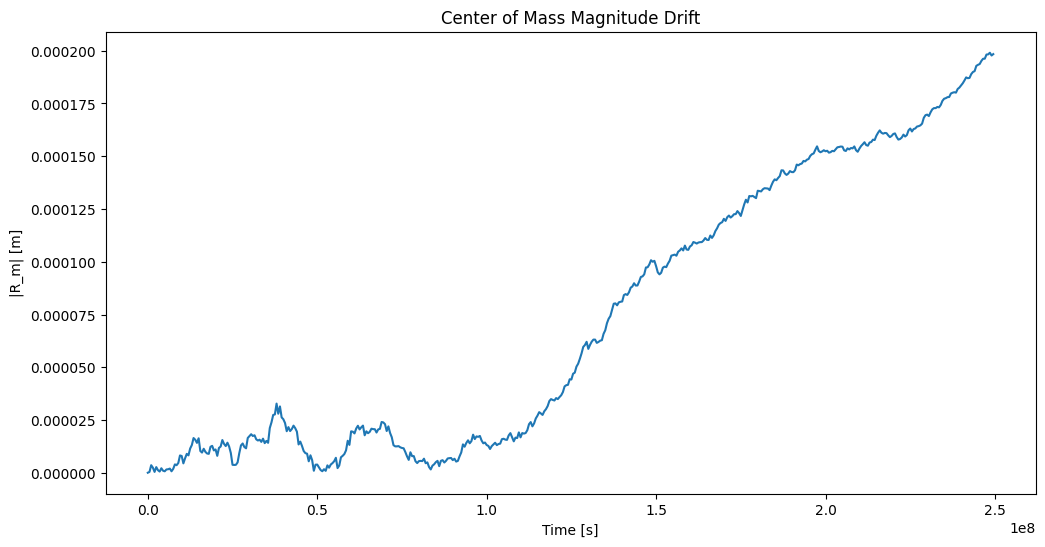

In [16]:
states = load_states("states(dt500st500k).json")
t = [s['t'] for s in states]

E0 = total_energy(states[0]['x'], states[0]['v'], states[0]['m'])
errors = [(total_energy(s['x'], s['v'], s['m']) - E0) / abs(E0)
          for s in states]
plot_energy_error(errors, t)

L0 = total_angular_momentum(states[0]['x'], states[0]['v'], states[0]['m'])
dL = [np.linalg.norm(total_angular_momentum(s['x'], s['v'],states[0]['m']) - L0)
      for s in states]
plot_total_angular_momentum(dL, t)

M0 = np.linalg.norm(total_linear_momentum(states[0]['v'], states[0]['m']))
dM = [np.linalg.norm(total_linear_momentum(s['v'], s['m']) - M0)
      for s in states]
plot_total_linear_momentum(dM, t)

com = np.linalg.norm([center_of_mass(s["x"], s["m"])
    for s in states], axis=1)
plot_center_of_mass(com, t)
#COM = center_of_mass(x, m)

In [6]:
print(errors)

[0.0, -3.1473565897737215e-09, -9.515240414138432e-09, -1.54502249761566e-08, -2.002497496298123e-08, -2.34276231308444e-08, -2.5984223429930172e-08, -2.7947846439720234e-08, -2.949155058853115e-08, -3.073144830426372e-08, -3.174633074133601e-08, -3.259079240026539e-08, -3.3303541297446394e-08, -3.3912620350366283e-08, -3.4438773167826633e-08, -3.489764104393413e-08, -3.530120914101629e-08, -3.5658800966610015e-08, -3.597778250889257e-08, -3.626403566107168e-08, -3.65223154329476e-08, -3.675650580964783e-08, -3.696980854984469e-08, -3.716488073602082e-08, -3.734395136832295e-08, -3.75089063332855e-08, -3.766134289050081e-08, -3.780262816005889e-08, -3.7933937606139686e-08, -3.805628894829738e-08, -3.817056387992336e-08, -3.827753588311982e-08, -3.8377880135367124e-08, -3.847219427542255e-08, -3.85610050712695e-08, -3.86447794698618e-08, -3.872392840738035e-08, -3.87988296707731e-08, -3.8869811323138556e-08, -3.893717494629146e-08, -3.9001189925377755e-08, -3.9062097640156906e-08, -3.91

In [7]:
print(dL)

[0.0, 9.066943647109719e+23, 1.5111572745182865e+24, 3.32454600394023e+24, 2.115620184325601e+24, 5.742397643169489e+24, 5.440166188265831e+24, 4.231240368651202e+24, 1.5111572745182865e+24, 4.231240368651202e+24, 4.5334718235548594e+24, 2.115620184325601e+24, 3.022314549036573e+24, 2.4178516392292583e+24, 6.044629098073146e+23, 1.2089258196146292e+24, 2.7200830941329156e+24, 3.32454600394023e+24, 4.5334718235548594e+24, 3.6267774588438875e+24, 1.5111572745182865e+24, 0.0, 1.5111572745182865e+24, 1.5111572745182865e+24, 6.044629098073146e+23, 6.044629098073146e+23, 1.2089258196146292e+24, 1.5111572745182865e+24, 1.2089258196146292e+24, 1.8133887294219438e+24, 6.044629098073146e+23, 9.066943647109719e+23, 9.066943647109719e+23, 9.066943647109719e+23, 6.044629098073146e+23, 2.4178516392292583e+24, 1.2089258196146292e+24, 2.4178516392292583e+24, 1.5111572745182865e+24, 1.8133887294219438e+24, 1.5111572745182865e+24, 0.0, 9.066943647109719e+23, 1.5111572745182865e+24, 9.066943647109719e+23

In [8]:
print(dM)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,